In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [55]:
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
df.describe()

Dataset shape: (303, 14)

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Basic statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [57]:
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})
df['target'] = df['target'].map({1: 'Disease', 0: 'No Disease'})
df['exang'] = df['exang'].map({1: 'Yes', 0: 'No'})
df['fbs'] = df['fbs'].map({1: 'Yes', 0: 'No'})

cp_labels = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'}
df['cp'] = df['cp'].map(cp_labels)

restecg_labels = {0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Left Ventricular Hypertrophy'}
df['restecg'] = df['restecg'].map(restecg_labels)

slope_labels = {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'}
df['slope'] = df['slope'].map(slope_labels)

thal_labels = {0: 'Normal', 1: 'Fixed Defect', 2: 'Reversible Defect', 3: 'Reversible Defect'}
df['thal'] = df['thal'].map(thal_labels)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,Yes,Normal,150,No,2.3,Upsloping,0,Fixed Defect,Disease
1,37,Male,Non-anginal Pain,130,250,No,ST-T Wave Abnormality,187,No,3.5,Upsloping,0,Reversible Defect,Disease
2,41,Female,Atypical Angina,130,204,No,Normal,172,No,1.4,Downsloping,0,Reversible Defect,Disease
3,56,Male,Atypical Angina,120,236,No,ST-T Wave Abnormality,178,No,0.8,Downsloping,0,Reversible Defect,Disease
4,57,Female,Typical Angina,120,354,No,ST-T Wave Abnormality,163,Yes,0.6,Downsloping,0,Reversible Defect,Disease


## Data Visualizations by Type and Complexity

### Basic Distribution Visualizations

We'll start with simple visualizations to understand the distribution of key features.

C:\Users\addyg\AppData\Local\Temp\ipykernel_15824\2810611261.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




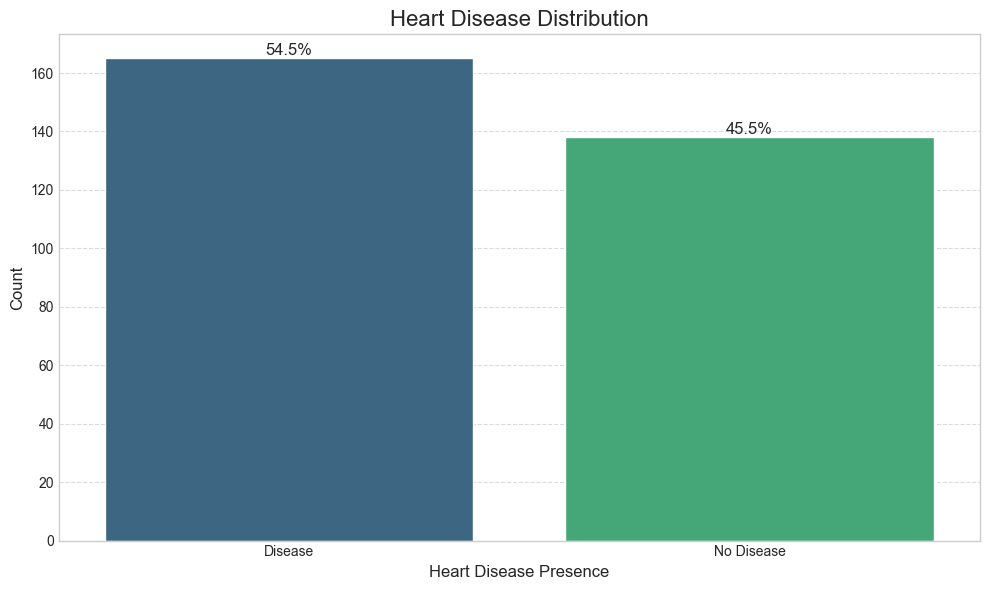

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Heart Disease Distribution', fontsize=16)
plt.xlabel('Heart Disease Presence', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

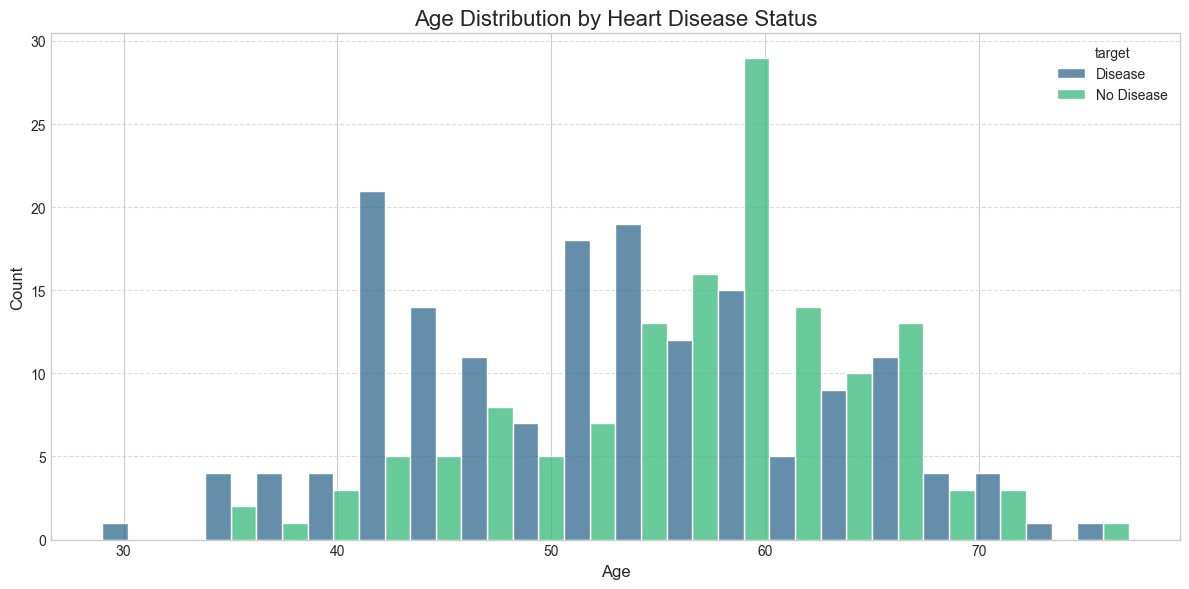

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='target', multiple='dodge', bins=20, palette='viridis')
plt.title('Age Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

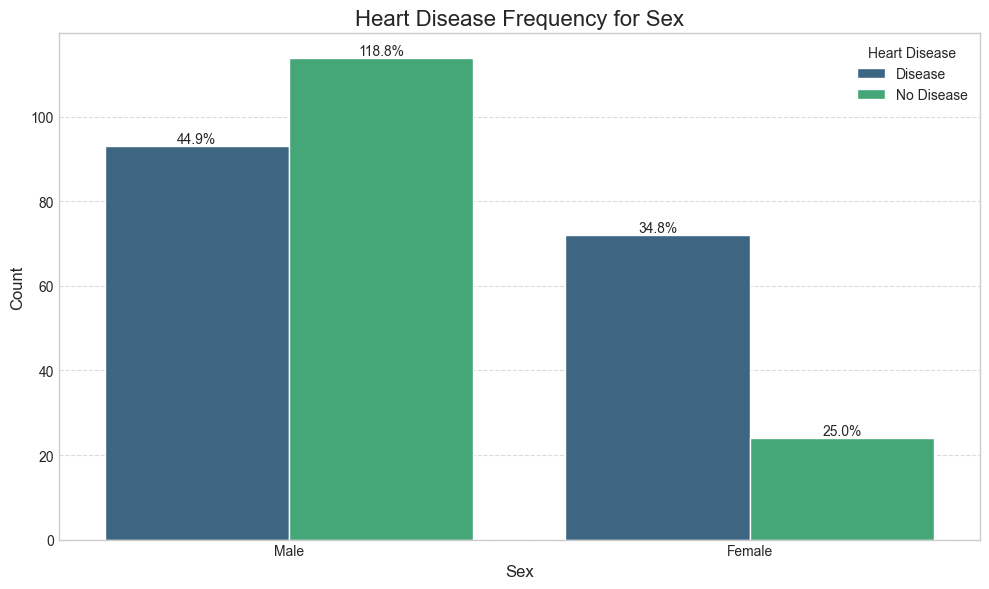

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=df, palette='viridis')
plt.title('Heart Disease Frequency for Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(2):
    total = len(df[df['sex'] == ('Male' if i == 0 else 'Female')])
    for j, p in enumerate(plt.gca().patches[i*2:(i+1)*2]):
        percentage = f'{100 * p.get_height() / total:.1f}%'
        plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

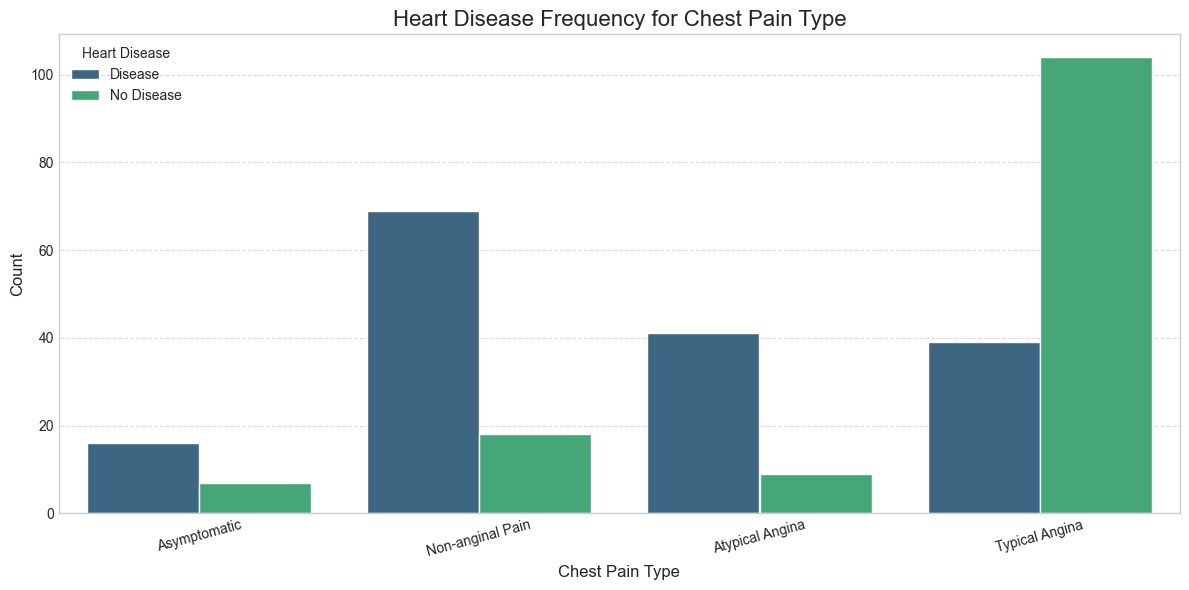

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(x='cp', hue='target', data=df, palette='viridis')
plt.title('Heart Disease Frequency for Chest Pain Type', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Heart Disease', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Relationship Visualizations

These visualizations help us understand the relationships between different variables.

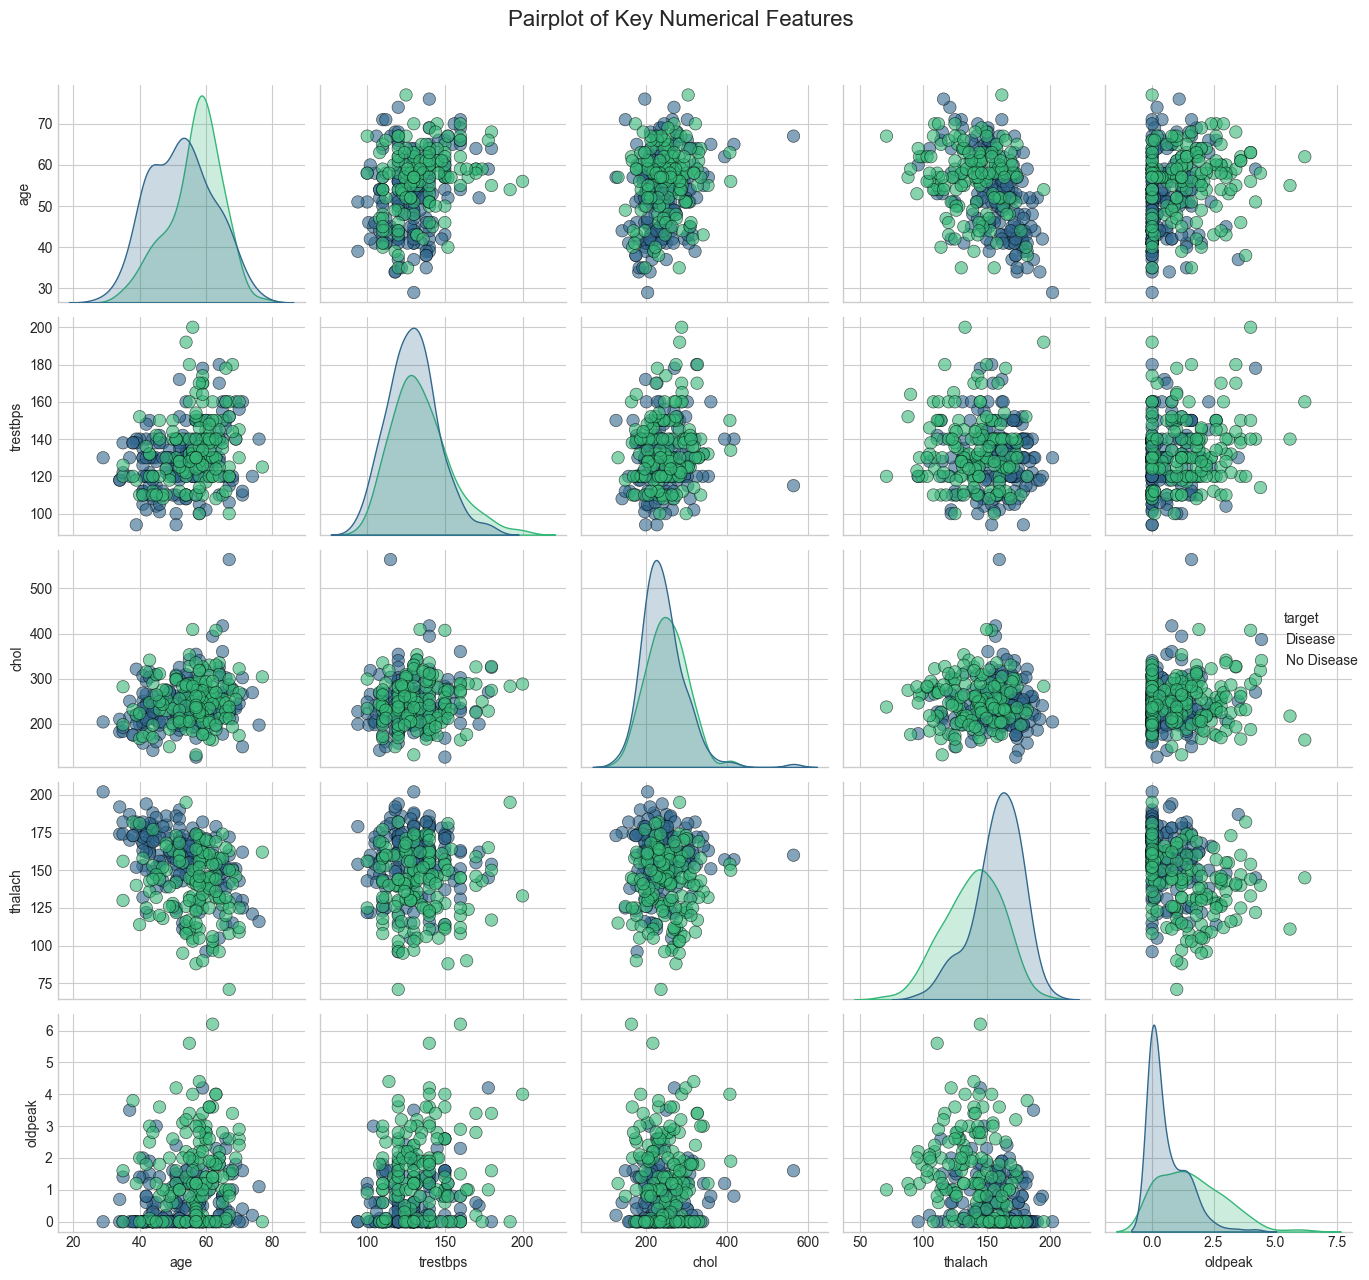

In [63]:
sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], 
            hue='target', palette='viridis', diag_kind='kde', 
            plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k', 'linewidth': 0.5})
plt.suptitle('Pairplot of Key Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### Interactive Visualizations with Plotly

Interactive visualizations provide a dynamic way to explore the data.

In [64]:
fig = px.scatter(df, x='age', y='thalach', color='target', 
                 hover_data=['sex', 'cp', 'trestbps', 'chol'],
                 title='Age vs Maximum Heart Rate by Disease Status',
                 labels={'age': 'Age', 'thalach': 'Maximum Heart Rate', 'target': 'Heart Disease'},
                 color_discrete_sequence=['#636EFA', '#EF553B'],
                 size_max=10, opacity=0.7)

fig.update_layout(template='plotly_white',
                  title_font_size=20,
                  xaxis_title_font_size=16,
                  yaxis_title_font_size=16)

fig.show()

C:\Users\addyg\AppData\Local\Temp\ipykernel_15824\1144351104.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



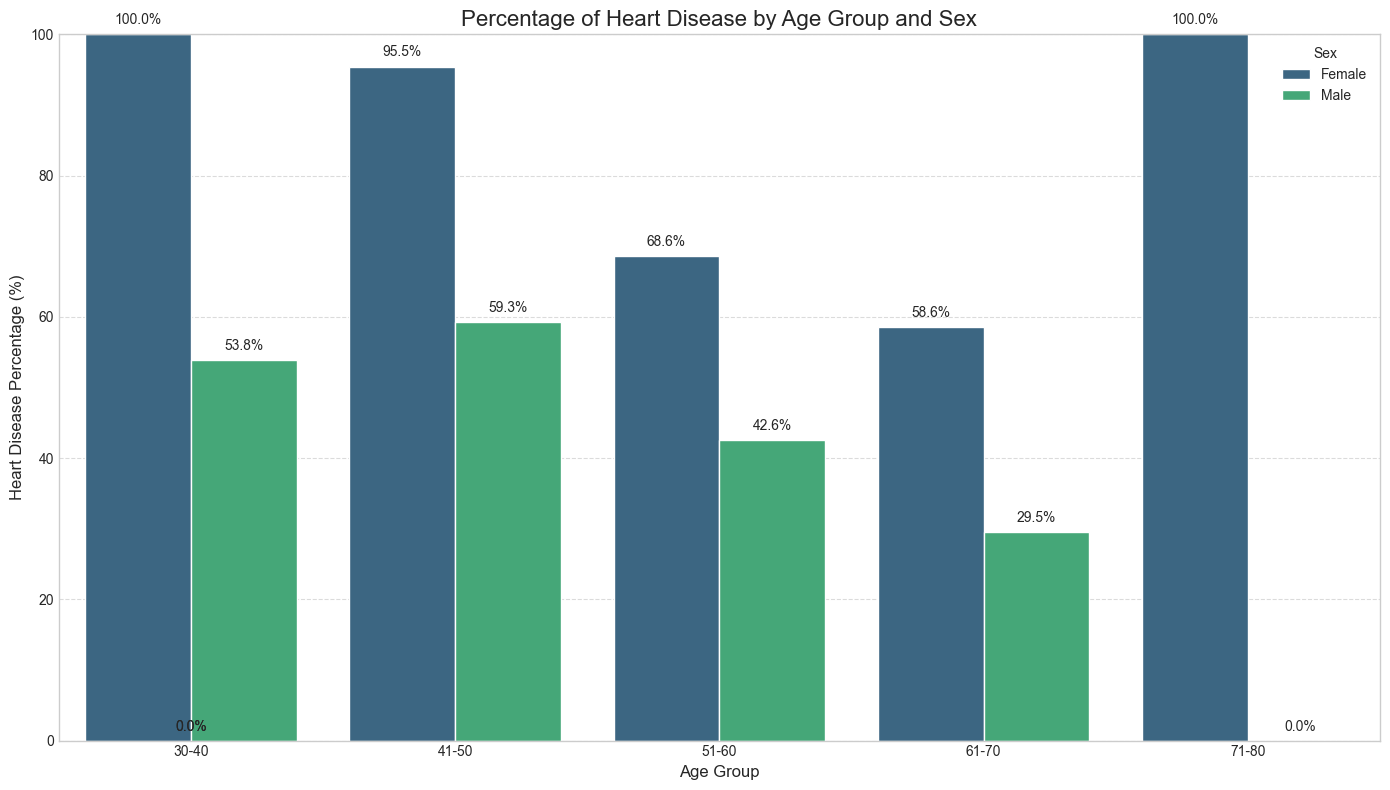

In [65]:
df['age_group'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 70, 80], 
                        labels=['30-40', '41-50', '51-60', '61-70', '71-80'])

heart_disease_by_age_sex = df.groupby(['age_group', 'sex'])['target'].apply(
    lambda x: (x == 'Disease').mean() * 100).reset_index()
heart_disease_by_age_sex.rename(columns={'target': 'disease_percentage'}, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='age_group', y='disease_percentage', hue='sex', data=heart_disease_by_age_sex, palette='viridis')

plt.title('Percentage of Heart Disease by Age Group and Sex', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Heart Disease Percentage (%)', fontsize=12)
plt.legend(title='Sex', fontsize=10)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_x() + bar.get_width()/2., 
             bar.get_height() + 1, 
             f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [66]:
fig = px.box(df, x='sex', y='chol', color='target',
             title='Cholesterol Distribution by Sex and Heart Disease Status',
             labels={'sex': 'Sex', 'chol': 'Cholesterol (mg/dl)', 'target': 'Heart Disease'},
             color_discrete_sequence=['#636EFA', '#EF553B'])

fig.update_layout(template='plotly_white',
                  title_font_size=20,
                  xaxis_title_font_size=16,
                  yaxis_title_font_size=16,
                  boxmode='group')

fig.show()

## Statistical Distribution Visualizations

These visualizations focus on statistical distributions and patterns in the data.

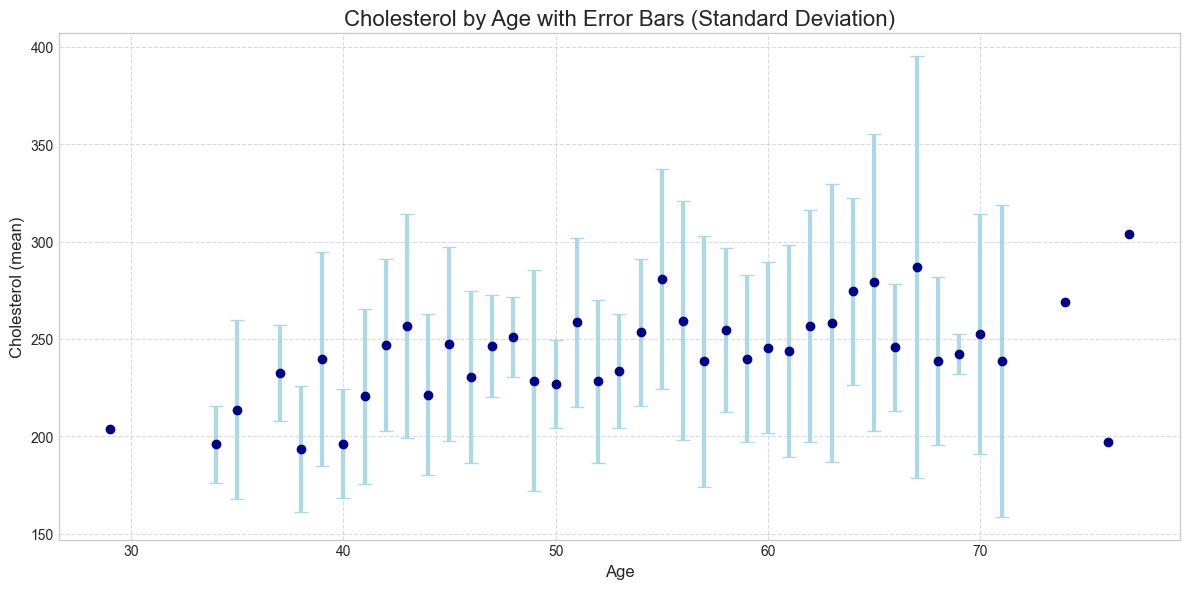

In [67]:
age_chol = df.groupby('age')['chol'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 6))
plt.errorbar(x=age_chol['age'], y=age_chol['mean'], yerr=age_chol['std'], 
             fmt='o', color='darkblue', ecolor='lightblue', elinewidth=3, capsize=5)

plt.title('Cholesterol by Age with Error Bars (Standard Deviation)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mean)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

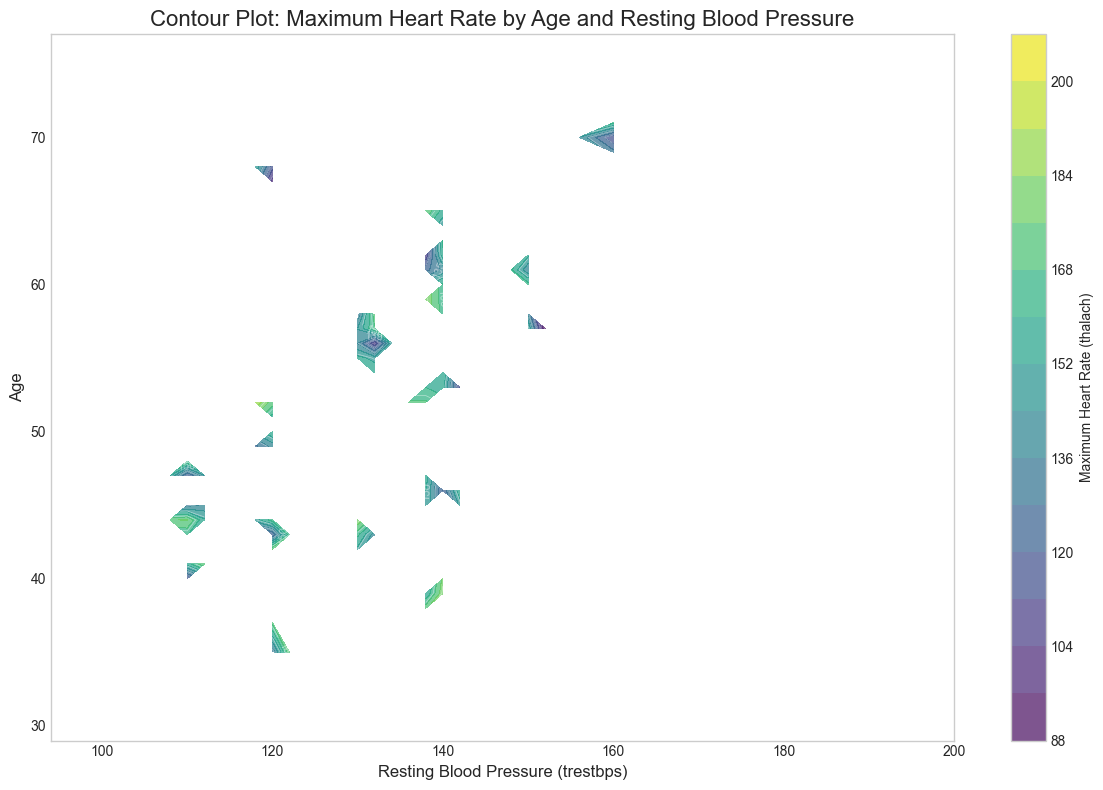

In [68]:
plt.figure(figsize=(12, 8))

contour_data = df.pivot_table(index='age', columns='trestbps', values='thalach', aggfunc='mean')

contour = plt.contourf(contour_data.columns, contour_data.index, contour_data.values, 
                      cmap='viridis', levels=15, alpha=0.7)

plt.colorbar(contour, label='Maximum Heart Rate (thalach)')

contour_lines = plt.contour(contour_data.columns, contour_data.index, contour_data.values, 
                           colors='white', alpha=0.5, linewidths=0.5, levels=10)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%.0f')

plt.title('Contour Plot: Maximum Heart Rate by Age and Resting Blood Pressure', fontsize=16)
plt.xlabel('Resting Blood Pressure (trestbps)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

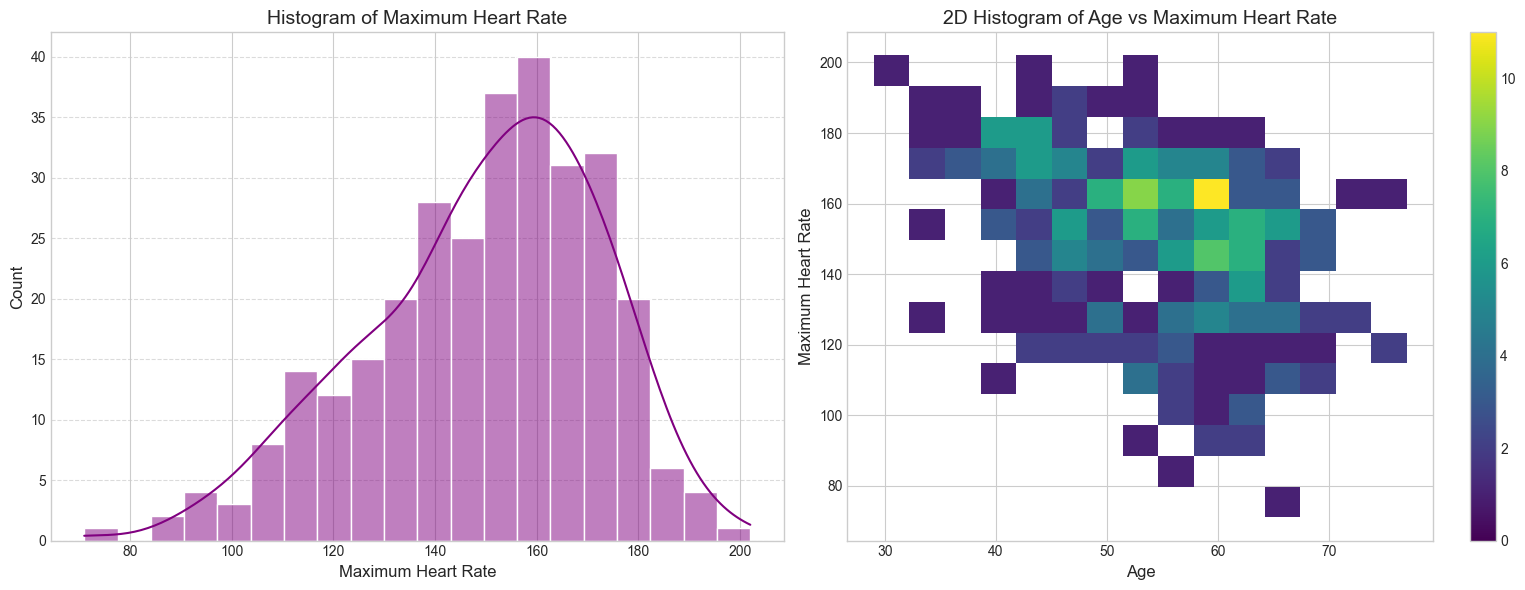

In [69]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='thalach', bins=20, kde=True, color='purple')
plt.title('Histogram of Maximum Heart Rate', fontsize=14)
plt.xlabel('Maximum Heart Rate', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='age', y='thalach', bins=15, cmap='viridis', cbar=True)
plt.title('2D Histogram of Age vs Maximum Heart Rate', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Maximum Heart Rate', fontsize=12)

plt.tight_layout()
plt.show()

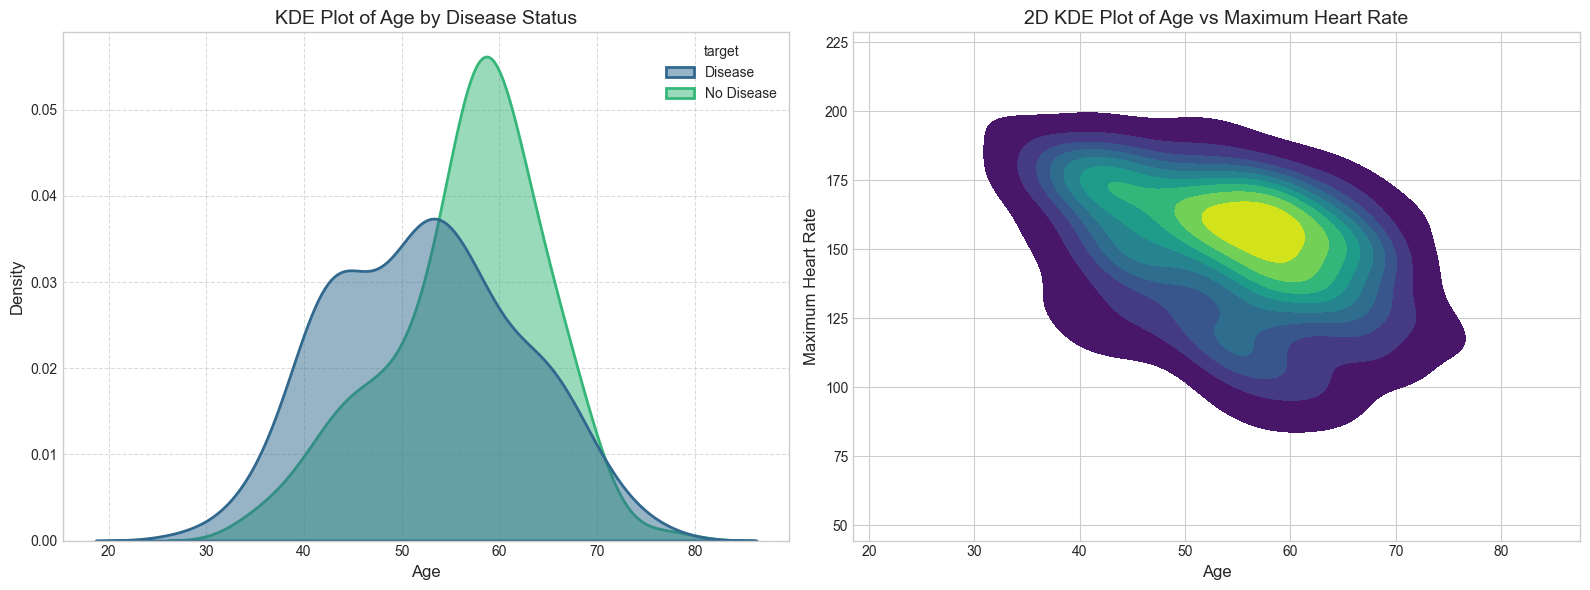

In [70]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='age', hue='target', fill=True, common_norm=False, 
           palette='viridis', alpha=.5, linewidth=2)
plt.title('KDE Plot of Age by Disease Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='age', y='thalach', cmap='viridis', fill=True, thresh=0.05)
plt.title('2D KDE Plot of Age vs Maximum Heart Rate', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Maximum Heart Rate', fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

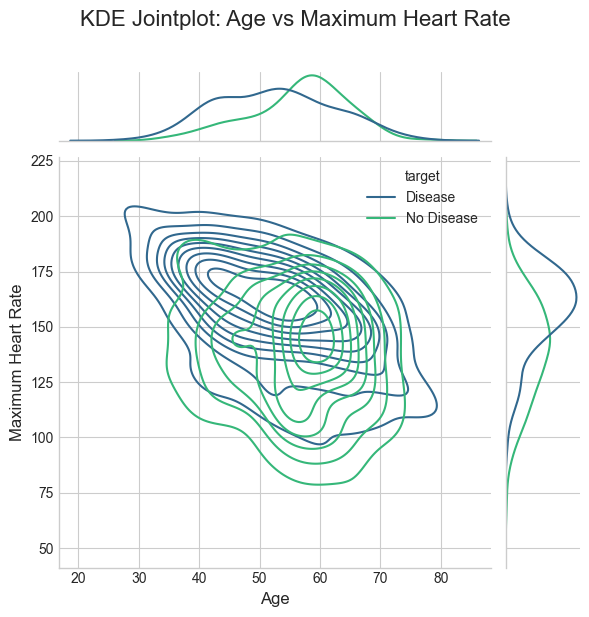

<Figure size 1200x1000 with 0 Axes>

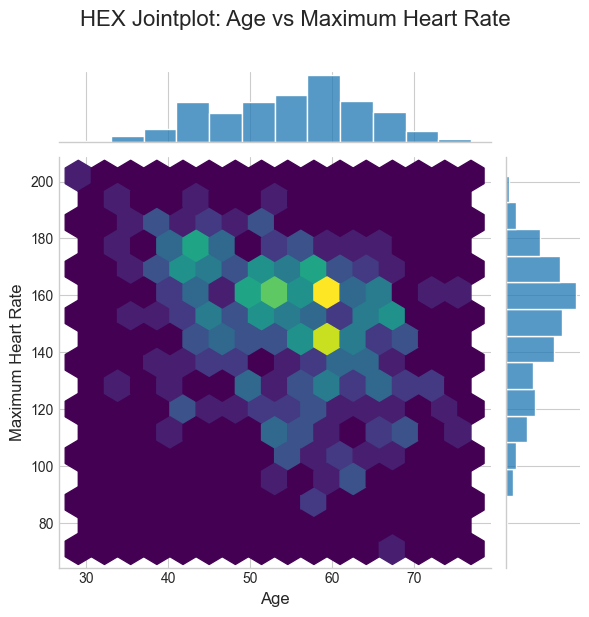

In [71]:
plt.figure(figsize=(12, 10))
jointplot_kde = sns.jointplot(data=df, x='age', y='thalach', hue='target', 
                            kind='kde', palette='viridis')
jointplot_kde.fig.suptitle('KDE Jointplot: Age vs Maximum Heart Rate', fontsize=16, y=1.02)
jointplot_kde.set_axis_labels('Age', 'Maximum Heart Rate', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
jointplot_hex = sns.jointplot(data=df, x='age', y='thalach', kind='hex', 
                           gridsize=15, cmap='viridis')
jointplot_hex.fig.suptitle('HEX Jointplot: Age vs Maximum Heart Rate', fontsize=16, y=1.02)
jointplot_hex.set_axis_labels('Age', 'Maximum Heart Rate', fontsize=12)
plt.tight_layout()
plt.show()

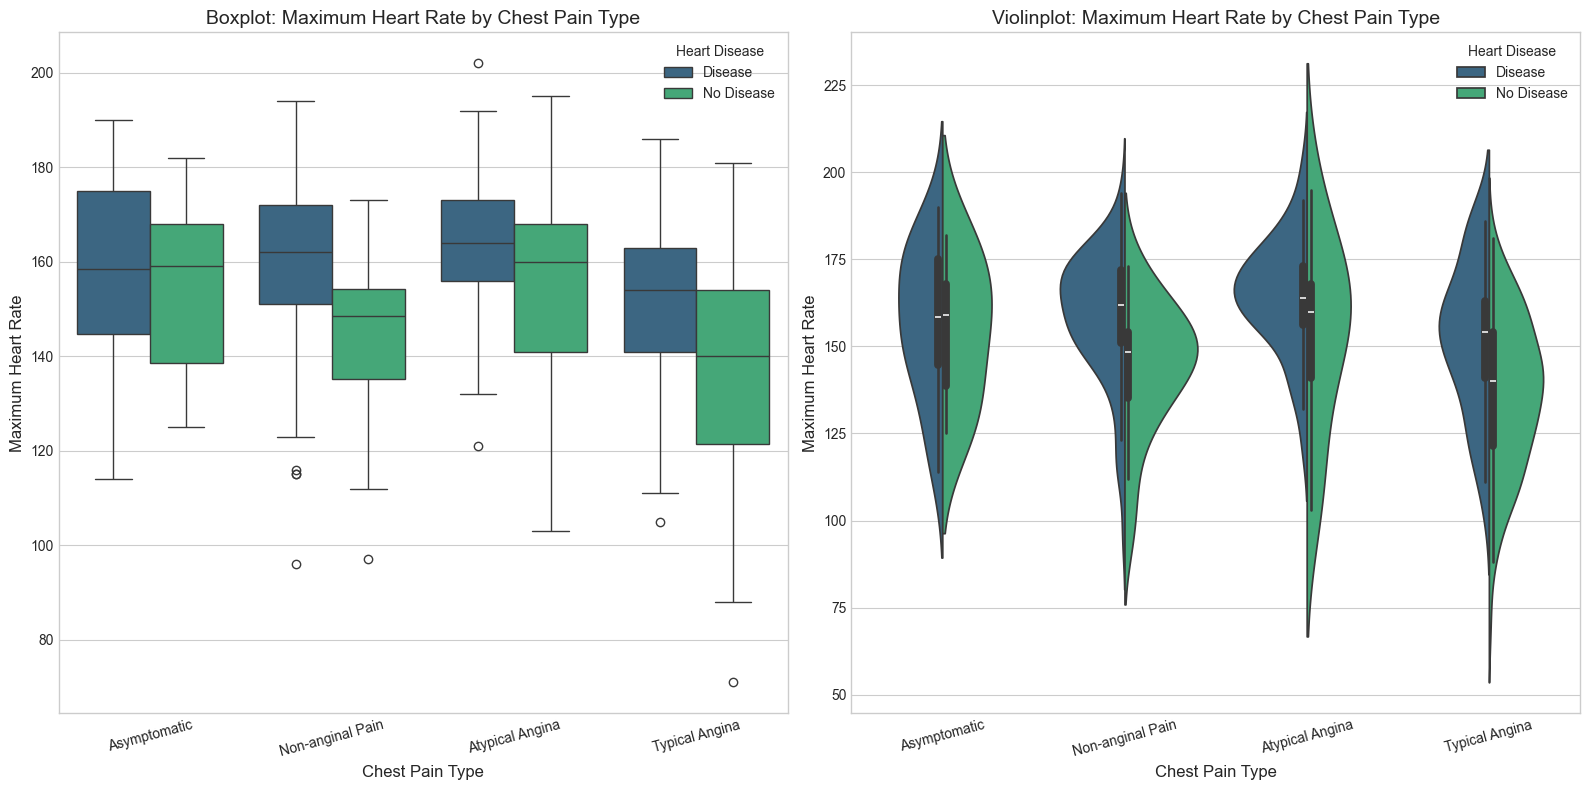

In [72]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='cp', y='thalach', hue='target', data=df, palette='viridis')
plt.title('Boxplot: Maximum Heart Rate by Chest Pain Type', fontsize=14)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Maximum Heart Rate', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Heart Disease', fontsize=10)

plt.subplot(1, 2, 2)
sns.violinplot(x='cp', y='thalach', hue='target', data=df, palette='viridis', split=True)
plt.title('Violinplot: Maximum Heart Rate by Chest Pain Type', fontsize=14)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Maximum Heart Rate', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Heart Disease', fontsize=10)

plt.tight_layout()
plt.show()

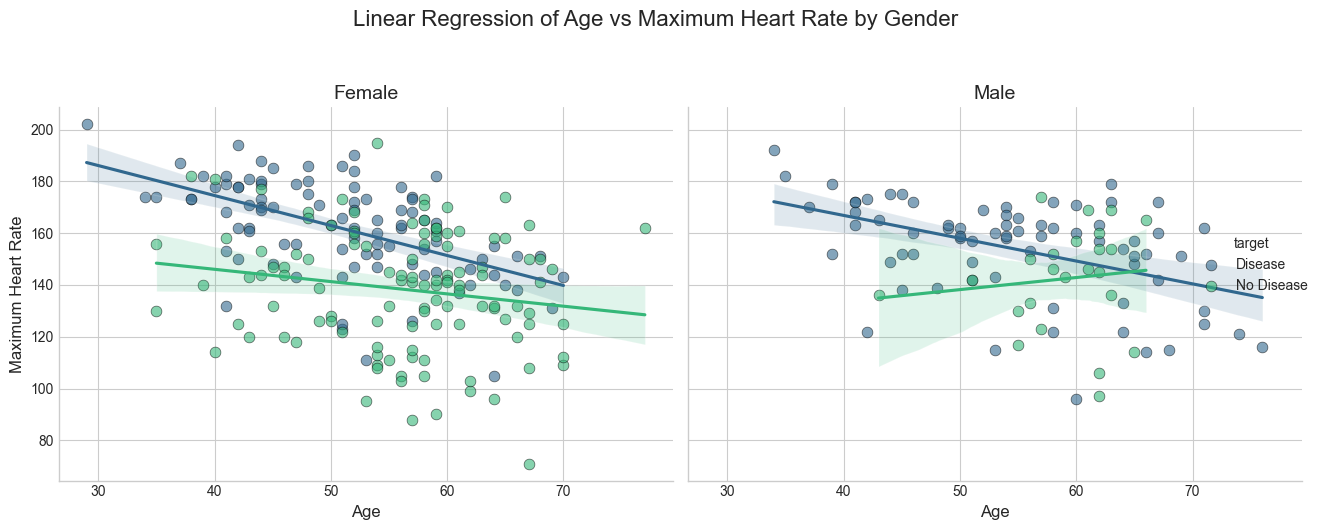

In [73]:
lmplot = sns.lmplot(data=df, x='age', y='thalach', hue='target', col='sex',
                   palette='viridis', height=5, aspect=1.2, 
                   scatter_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k', 'linewidth': 0.5})

lmplot.fig.suptitle('Linear Regression of Age vs Maximum Heart Rate by Gender', fontsize=16, y=1.05)
lmplot.set_axis_labels('Age', 'Maximum Heart Rate', fontsize=12)

axes = lmplot.axes
axes[0][0].set_title('Female', fontsize=14)
axes[0][1].set_title('Male', fontsize=14)

plt.tight_layout()
plt.show()